<a href="https://colab.research.google.com/github/Sarraalii/Machine-Learning-Proj/blob/main/Heart_failure_NeuralNets1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<br>

<font color='#8f5e8e' size=5 align="left">CHL5230–Applied Machine Learning for Health Data</font><br>
<font color='#532b88' size=4 align="left">Instructor: Zahra Shakeri–Fall 2023</font><br>
<font color='#919180' size=3 align="left">Dalla Lana School of Public Health-University of Toronto </font>
<div>
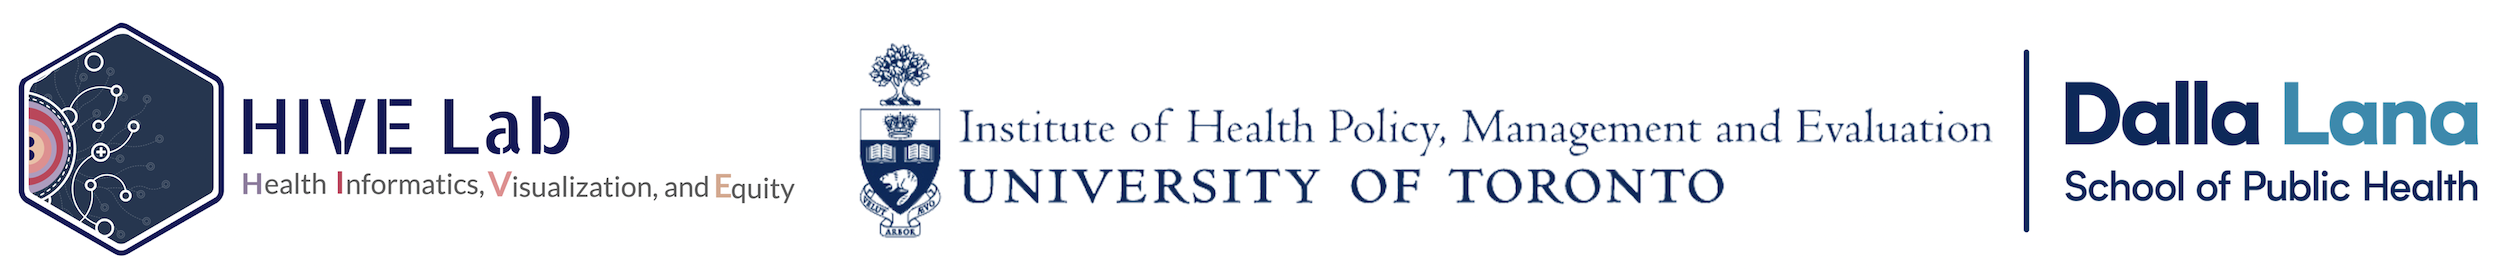
</div>


<hr>
<br>
<h1><font color='#532b88'>Introduction to Neural Networks</font></h1>

### *Unlocking Insights, Layer by Layer*


Neural Networks, often referred to as "Deep Learning," are an integral part of machine learning, taking inspiration from the human brain's intricate structure. They consist of layers of interconnected nodes, similar to neurons in the brain, and possess the unique ability to learn from data. In the field of health data science, comprehending Neural Networks is of paramount importance. This is because they excel in unraveling intricate patterns within vast datasets. Health-related phenomena are influenced by a multitude of interconnected factors, making their analysis a complex endeavor. Neural Networks emerge as a powerful tool for deciphering this complexity. By gaining a solid understanding of how Neural Networks operate and their applications in healthcare, you can tap into their potential to enhance diagnostic precision, tailor treatment strategies, and gain profound insights into various health conditions.

**Why Neural Network?** In machine learning, we aim to discover a function $f$ that predicts an outcome, $y$ from a set of input features, $x$. Typically, this process involves assuming a specific form for $f$ and then modeling it with an algorithm. But imagine if we could design a flexible function capable of modeling *any level of complexity* without predefined assumptions, learning to predict $y$ from $x$ solely based on the data it receives. This idea draws inspiration from the way our brains work. Within our brains, about 85 billion neurons are interlinked, exchanging signals and ultimately making decisions that lead to actions or thoughts.

**Deep Learning** seeks to mimic this biological network by connecting simple computational units that resemble the neurons in our brains. Mathematically, it is proven that a large and complex network of these units can approximate any conceivable function.

Let us begin with the fundamentals of Deep Learning by examining a single-neuron model:

- **Perceptron**: A perceptron is the simplest neural network, made up of just one neuron. It receives inputs, assigns weights to them, and produces an output.
- **Weights**: These are crucial parameters within the neural network. They are fine-tuned during the learning process and determine how much influence each input has on the output.
- **Bias**: This is an adjustable value that lets the model produce the correct output even when all inputs are zero, adding an extra degree of freedom.
- **Activation Function**: Applied to the weighted sum of the inputs plus the bias, the activation function determines whether a neuron will activate. It introduces non-linearity to the model, which is essential for learning complex patterns.
- **Learning Rate**: This parameter controls the adjustment magnitude of the weights with each iteration, which is vital for the model to converge to a solution.
- **Epochs**: These represent full cycles through the entire dataset. Multiple epochs are typically required for the network to learn effectively.

The process of a neuron's operation might sound complex, but it is essentially the product of each input feature and its corresponding weight, summed together and then adjusted by a bias term—akin to what we do in linear regression. After this computation, we apply a non-linear function to this sum to obtain the output. This forms the basic building block of a neural network.

<div style="text-align:center;">
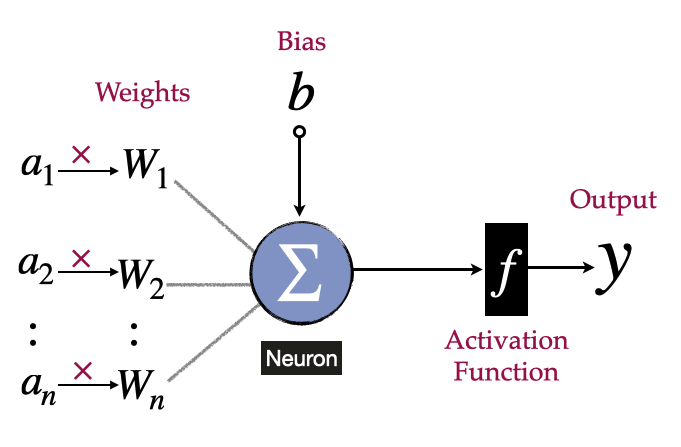
</div>

Why is a non-linear function vital? The answer is simple: without it, no matter how many layers we add to our network, it would perform as a mere linear function, incapable of capturing the complexities in the data.
This non-linear function is commonly known as the activation function. While there are several to choose from, it is crucial that they are non-linear. ReLU (Rectified Linear Unit) and Tanh (Hyperbolic Tangent) are among the popular choices in deep learning.
Take a look at the ReLU function depicted in the following figure.

<div style="text-align:center;">
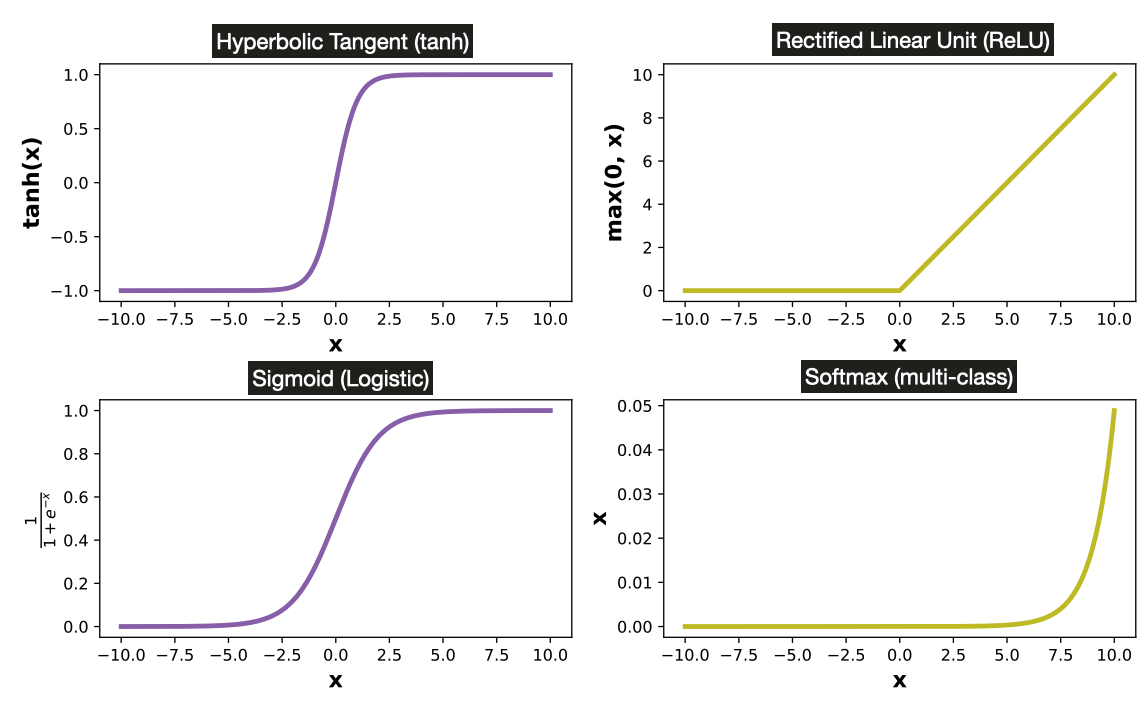
</div>



In this tutorial, we will explore the practical aspects of building a neural network by starting with the fundamental unit: the `neuron`. Before we roll up our sleeves and dive into coding, let's clear up some concepts about the tools we will be using.

When it comes to deep learning libraries, two names often come to the forefront: `TensorFlow` and `PyTorch`. Both are powerful libraries for numerical computation and machine learning, but they have their distinctions and use cases.

### Tensors in PyTorch vs. TensorFlow

A Tensor, in both TensorFlow and PyTorch, is a generalization of vectors and matrices to potentially higher dimensions. In both libraries, Tensors are the basic building blocks of neural networks.

- **TensorFlow**: Developed by Google, TensorFlow is designed for large-scale distributed training and has an extensive ecosystem for various machine learning tasks. Its tensors are immutable, meaning that their values can not be changed once set.

- **PyTorch**: Created by Facebook, PyTorch emphasizes flexibility and speed. It is particularly known for its dynamic computation graph (called the dynamic computational graph), which allows changes to the network architecture on the fly. PyTorch tensors are mutable, and operations are often more Pythonic, aligning closely with NumPy.

### Why Choose PyTorch?

For our purposes, we will use PyTorch for several reasons:

1. **Ease of Use**: PyTorch is known for its simplicity and more intuitive handling, which makes it an excellent choice for beginners and for prototyping.
2. **Dynamic Computation Graph**: PyTorch’s dynamic computation graph allows for more flexibility in building complex architectures, which is a boon for research and development.
3. **Pythonic Nature**: PyTorch is deeply integrated with Python, and using it feels like a natural extension of Python's capabilities, making it easier for Python developers to learn and use.
4. **Community and Support**: PyTorch has a robust and growing community, providing a wealth of tutorials, forums, and pre-trained models to help accelerate development.

### PyTorch in the Health Domain

In the health domain, PyTorch has been gaining popularity, though whether it outperforms Keras (a high-level neural networks API, running on top of TensorFlow) depends on the specific application and requirements. PyTorch provides **fine-grained control** over network design, which can be crucial for research purposes and customizing models to handle the complexity of medical data.

Now, let's start with our practical exercise. We will implement a single neuron using PyTorch, leveraging its tensor operations, which are akin to NumPy but with the added benefit of GPU acceleration, enabling us to perform computations much faster than on a CPU alone. This feature is particularly advantageous when dealing with large datasets, a common scenario in health informatics.

In PyTorch, operations are straightforward. If you are already familiar with NumPy, you will find PyTorch's tensor operations to be quite similar. From slicing and reshaping to performing element-wise computations, PyTorch makes it seamless to apply these operations on multidimensional arrays, or tensors, which are the core data structures in neural network computations.

As we progress through this tutorial, we will see firsthand how to build, train, and manipulate a neuron in PyTorch, setting the foundation for more complex neural networks that you will be creating down the line. So, let's get started with PyTorch and see the power it brings to our neural network programming!

### Importing Necessary Libraries

In [ ]:
# importing PyTorch library as 't' for convenience
import torch as t

# importing other necessary libraries
import numpy as np
from torch.nn.functional import sigmoid, relu, tanh
from torch.optim import Adam
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset, DataLoader

# importing PyTorch modules for building neural networks
from torch.nn import Tanh, Linear, Sequential, Sigmoid, Dropout


### Setting Up the Neuron's Input and Expected Output

This code defines input `X` and expected output `Y` for a neural network neuron. It is crucial for training the network to make predictions based on input data (`X`) and adjust its parameters to match the expected results (`Y`).

- `X` represents the input to a neuron, with one example having 3 features.
- `Y` represents the expected output for that input.

In [ ]:
# Defining the input to the neuron - a single example with 3 features
X = np.array([
    [0, 1, 2]
])

# Defining the expected output for the given input
Y = np.array([
    [1]
])

### Initializing Weights and Biases

This code snippet initializes weights and bias for a neural network, where `W` represents weights for 3 inputs to 1 output, and `B` is the bias with a single zero element.

- `W` is created as a tensor with random values of shape (3, 1).
- `B` is created as a tensor with a single zero element of shape (1, 1).

In [ ]:
# Initializing the weights randomly for 3 inputs and 1 output
W = t.randn((3,1))
print(W)
print(W.dtype) # Checking the data type of the weights tensor
print(W.shape) # Checking the shape of the weights tensor
print('===========')

# Initializing the bias as a tensor with a single zero element
B = t.zeros((1,1))
print(B)
print(B.dtype) # Checking the data type of the bias tensor
print(B.shape) # Checking the shape of the bias tensor

tensor([[-0.9773],
        [-0.3151],
        [ 1.4841]])
torch.float32
torch.Size([3, 1])
tensor([[0.]])
torch.float32
torch.Size([1, 1])


### Performing Matrix Multiplication and Adding Bias


The following code converts an input array to a PyTorch Tensor, performs matrix multiplication with pre-defined weights (`W`), and then adds the bias (`B`) to the result.

- `XW = t.Tensor(X) @ W`: Converts the input array `X` to a PyTorch Tensor and performs matrix multiplication with the weights `W`, storing the result in `XW`.
- `print(XW)`: Displays the result of the matrix multiplication.
- `XW_B = XW + B`: Adds the bias `B` to the previously calculated `XW` result, storing the final result in `XW_B`.
- `print(XW_B)`: Displays the result after adding the bias.

In [ ]:
# Converting the input array to a PyTorch Tensor and performing matrix multiplication with the weights
XW = t.Tensor(X) @ W
print(XW)

# Adding the bias to the result of the matrix multiplication
XW_B = XW + B
print(XW_B)

tensor([[2.6532]])
tensor([[2.6532]])


### Applying Activation Function
This code applies the hyperbolic tangent activation function element-wise to the result obtained earlier.

- `output = tanh(XW_B)`: Applies the hyperbolic tangent (tanh) activation function element-wise to the result stored in `XW_B`.

In [ ]:
# Applying the hyperbolic tangent activation function element-wise to the result
output = tanh(XW_B)
print(output)

tensor([[0.9901]])


### Computing Loss
The following code calculates the Mean Squared Error (MSE) loss between the predicted output and the actual output.
- `loss = t.nn.functional.mse_loss(output, t.Tensor(Y))`: Computes the MSE loss by comparing the predicted `output` with the actual target values `Y`, and stores the result in the variable `loss`.


In [ ]:
# Calculating the Mean Squared Error (MSE) loss between the predicted output and the actual output
loss = t.nn.functional.mse_loss(output, t.Tensor(Y))
print(loss)

tensor(9.7423e-05)


### Optimization and Loss Function Explanation

Next, we define and train a simple neural network (a single neuron) using PyTorch to perform binary classification on a batch of input examples.

#### Training with Multiple Inputs and Binary Classification

- `X = t.Tensor([...])`: Defines a batch of input examples, where each example has 3 features. These inputs are represented as a PyTorch tensor.
- `Y = t.Tensor([...])`: Defines the expected outputs (labels) corresponding to the input examples for a binary classification problem.
- `W = t.randn((3,1), requires_grad=True)`: Initializes the weights with random values and specifies that gradients should be computed for these weights during training.
- `B = t.zeros((1,1), requires_grad=True).type(t.float32)`: Initializes the bias as a tensor with zeros and specifies gradient computation for it.
- `loss_fn = t.nn.BCELoss()`: Defines the loss function as Binary Cross-Entropy Loss, suitable for binary classification tasks.
- `learning_rate = 1`: Sets the learning rate for the optimizer.
- `optimizer = Adam([W, B], lr=learning_rate)`: Configures the Adam optimizer to optimize the weights and bias with the specified learning rate.
- `number_of_iterations = 100`: Specifies the number of training iterations.
- `loss_list = []`: Initializes an empty list to store the loss values during training.

### Training Loop:

- A `for` loop runs for the specified number of iterations.
- In each iteration, a forward pass is performed to compute the predicted output (`out`) using the sigmoid activation function.
- The Binary Cross-Entropy Loss is calculated by comparing the predicted output (`out`) with the actual targets (`Y`).
- The loss value is recorded in the `loss_list` for visualization.
- Gradients are cleared (`optimizer.zero_grad()`) to prepare for the backward pass.
- The backward pass computes gradients (`loss.backward()`) for the loss with respect to the weights and bias.
- The optimizer updates the weights and bias based on the computed gradients (`optimizer.step()`).

### After Training:

- The code prints the probabilities predicted by the neuron for each input using the sigmoid activation function.

In [ ]:
# Defining multiple inputs for batch processing
X = t.Tensor([
    # A batch of examples with 3 features each
    [0, 5, 2],
    [0, 3, 4],
    # ...
]).type(t.float32)

# Defining the expected outputs for the batch of inputs (for a binary classification problem)
Y = t.Tensor([
    # Corresponding expected outputs (labels)
    [1],
    [1],
    # ...
]).type(t.float32)

# Initializing weights and bias with the requirement to compute gradients (for learning during training)
W = t.randn((3,1), requires_grad=True)
B = t.zeros((1,1), requires_grad=True).type(t.float32)

# Defining the loss function for binary classification (Binary Cross-Entropy Loss)
loss_fn = t.nn.BCELoss()

# Setting up the optimizer (Adam) with the parameters to optimize (weights and bias) and the learning rate
learning_rate = 1
optimizer = Adam([W, B], lr=learning_rate)

# Defining the number of iterations for training and a list to keep track of loss values
number_of_iterations = 100
loss_list = []
for _ in range(number_of_iterations):

    # Forward pass: computing the predicted output using the sigmoid activation function
    out = sigmoid(X @ W  + B)

    # Calculating the loss
    loss = loss_fn(out.view(-1), Y.view(-1))

    # Recording the loss value for visualization
    loss_list.append(loss.item())

    # Clearing previous gradients before the backward pass
    optimizer.zero_grad()

    # Backward pass: computing gradients
    loss.backward()

    # Updating the weights and bias based on the gradients computed
    optimizer.step()

# Printing the probabilities predicted by the neuron for each input
print(sigmoid(X @ W  + B))

tensor([[1.],
        [1.]], grad_fn=<SigmoidBackward0>)


### Visualizing Loss Over Iterations

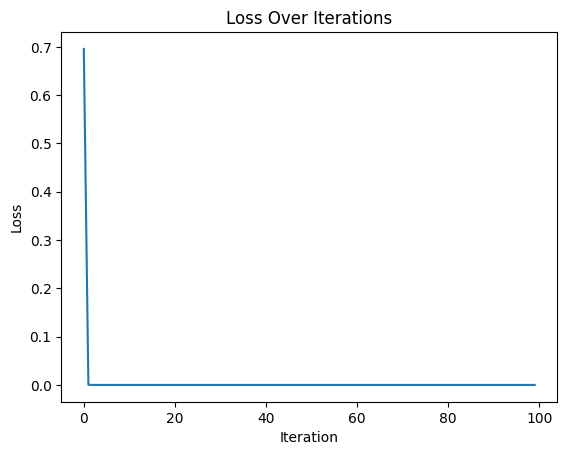

In [ ]:
# Plotting the loss values recorded during training
plt.plot([i for i in range(len(loss_list))], loss_list)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss Over Iterations')
plt.show()


<hr>
<br>
<font color='#532b88' size=5>Heart Failure Prediction Using Artificial Neural Networks</font>
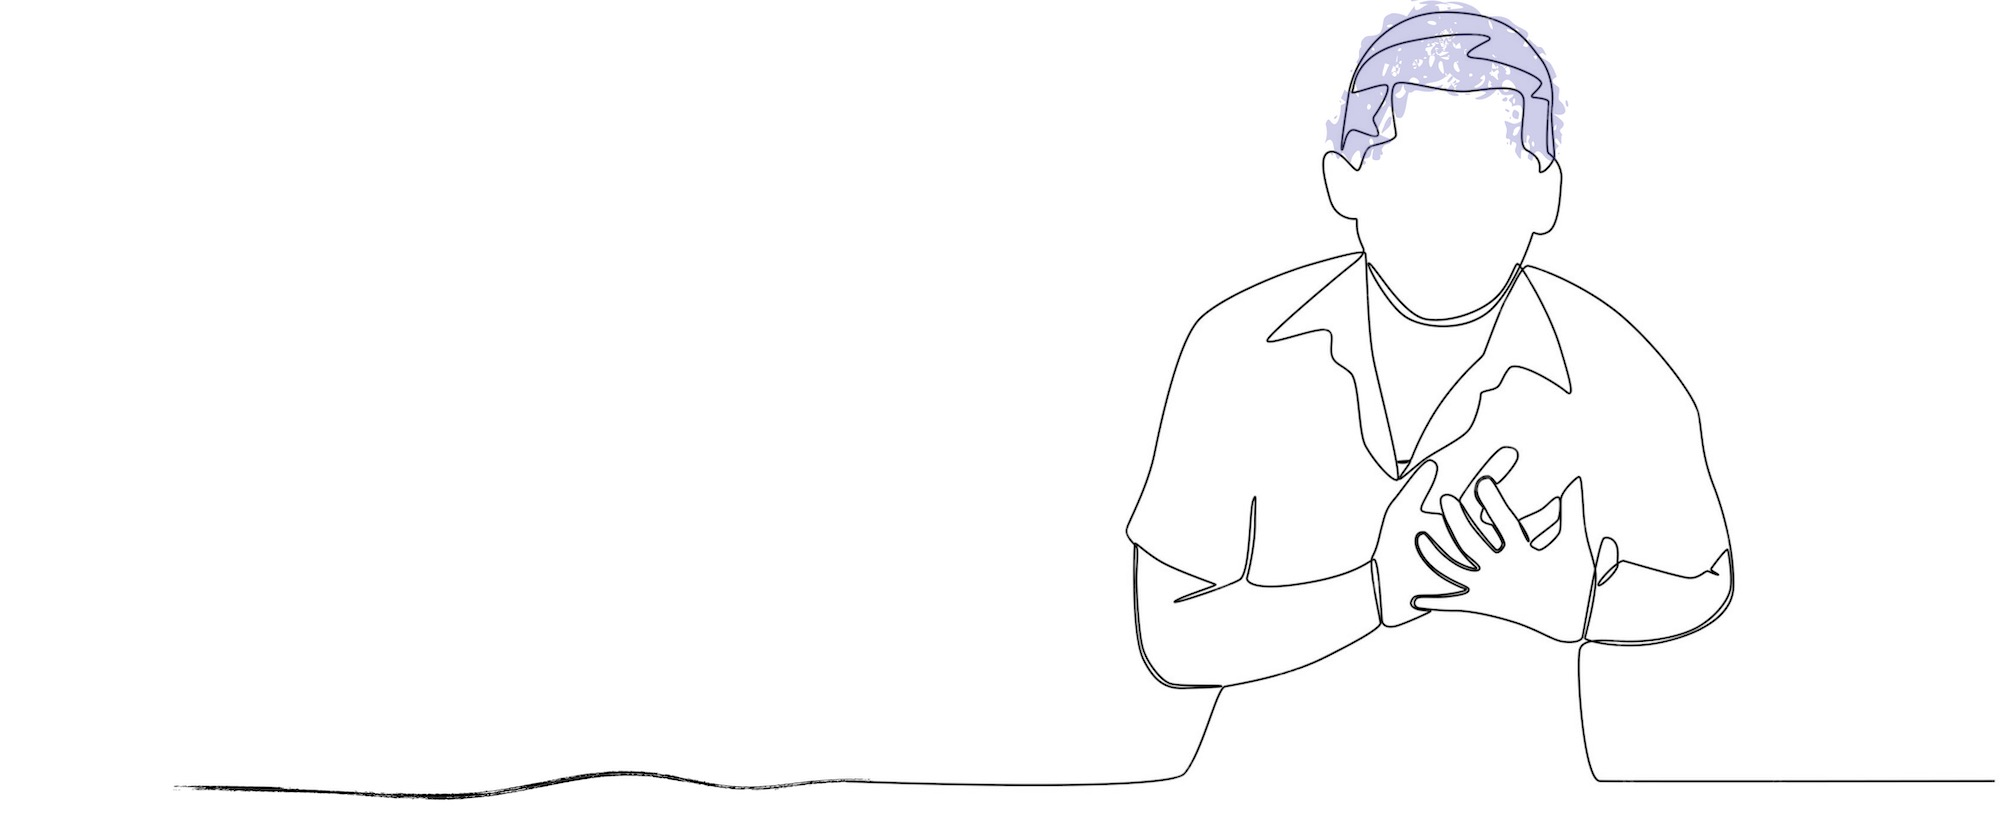


Cardiovascular diseases are a leading health concern in Canada. According to [Statistics Canada](https://www.statcan.gc.ca/o1/en/plus/353-heart-and-stroke-month), in 2020, heart disease or stroke claimed the lives of 67,399 Canadians, which was over four times the number of deaths from COVID-19 in the same year. Furthermore, [Public Health Ontario](https://www.publichealthontario.ca/en/Diseases-and-Conditions/Chronic-Diseases-and-Conditions/Cardiovascular-Disease) states that cardiovascular diseases are the leading cause of death among Canadian adults.

Heart failure, a common event resulting from cardiovascular diseases, is characterized by the heart's inability to pump an adequate supply of blood to the body. This insufficiency in blood flow disrupts major body functions. Essentially, heart failure can be described as a condition or a collection of symptoms that debilitate the heart. As per the [Canadian government's data](https://www.canada.ca/en/public-health/services/publications/diseases-conditions/heart-disease-canada.html), about 1 in 12 Canadian adults aged 20 and over live with diagnosed heart disease. Alarmingly, every hour, approximately 14 Canadian adults in this age group with diagnosed heart disease pass away.




| Attribute                  | Description                                              |
|---------------------------|----------------------------------------------------------|
| anaemia                   | Haemoglobin level of patient (Boolean)                  |
| creatinine_phosphokinase  | Level of the CPK enzyme in the blood (mcg/L)            |
| diabetes                  | If the patient has diabetes (Boolean)                   |
| ejection_fraction         | Percentage of blood leaving the heart at each contraction|
| high_blood_pressure       | If the patient has hypertension (Boolean)               |
| platelets                 | Platelet count of blood (kiloplatelets/mL)              |
| serum_creatinine          | Level of serum creatinine in the blood (mg/dL)          |
| serum_sodium              | Level of serum sodium in the blood (mEq/L)              |
| sex                       | Sex of the patient                                      |
| smoking                   | If the patient smokes or not (Boolean)                  |
| time                      | Follow-up period (days)                                 |
| DEATH_EVENT               | If the patient deceased during the follow-up period (Boolean) |
| Attributes with Boolean values: 0 = Negative (No); 1 = Positive (Yes) |

<font color='#532b88' size=5>Importing Necessary Libraries</font>

### Core Libraries

- **pandas**: `import pandas as pd`
    - `pandas` is an essential library for data manipulation and analysis. It provides data structures for efficiently storing large datasets and tools for working on them.
  
- **numpy**: `import numpy as np`
    - `numpy` is the core library for scientific computing in Python. It provides support for working with arrays (including mathematical operations), and is especially valuable when handling numeric data.

### Visualization Libraries

- **matplotlib**: `import matplotlib.pyplot as plt`
    - `matplotlib` is a plotting library for Python and its numerical mathematics extension, `numpy`.

### Machine Learning Libraries

1. `import torch as t`:
   - This line imports the PyTorch library and aliases it as `t` for convenience. PyTorch is a popular deep learning framework.

2. `import numpy as np`:
   - This line imports the NumPy library and aliases it as `np`. NumPy is a fundamental library for numerical computations in Python, often used for handling arrays and matrices.

3. `from torch.nn.functional import sigmoid, relu, tanh`:
   - This line imports specific activation functions (sigmoid, ReLU, and hyperbolic tangent or tanh) from the `torch.nn.functional` module. These functions are commonly used in neural networks to introduce non-linearity.

4. `from torch.optim import Adam`:
   - This line imports the Adam optimizer from the `torch.optim` module. Adam is a popular optimization algorithm used for training neural networks. It helps adjust the model's parameters during training to minimize the loss.

5. `from torch.utils.data import TensorDataset, DataLoader`:
   - This line imports the `TensorDataset` and `DataLoader` classes from the `torch.utils.data` module. These classes are used for organizing and loading data in PyTorch. `TensorDataset` combines input tensors and target tensors into a dataset, and `DataLoader` helps in creating data batches for training.

6. `from torch.nn import Tanh, Linear, Sequential, Sigmoid, Dropout`:
   - This line imports various neural network layers and components from the `torch.nn` module. These components include activation functions (Tanh, Sigmoid), linear layers (Linear), sequential containers (Sequential), and dropout layers (Dropout). These are building blocks for constructing neural network architectures.



In [ ]:
# !pip install torch

# importing torch as t
import torch as t
import numpy as np
from torch.nn.functional import sigmoid, relu, tanh
from torch.optim import Adam
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset, DataLoader

from torch.nn import Tanh, Linear, Sequential, Sigmoid, Dropout


In [ ]:
data = pd.read_csv('Heart_failure.csv')
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


##### Checking Data Types

Understanding the data types of each column in a dataset is important. Knowing whether a column contains integers, floating-point numbers, or text can guide subsequent data processing steps. The `dtypes` attribute of a pandas DataFrame displays the data types of each column.

In [ ]:
# checking the data types
data.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

The `.columns` attribute of a pandas DataFrame returns the column labels of the DataFrame.

In [ ]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

  - `data['DEATH_EVENT']`: This extracts the 'DEATH_EVENT' column from our dataframe.
  - `.mean()`: This function calculates the average of the values in the column. Since our target variable is binary (0 or 1), the mean gives us the proportion of positive cases.

In [ ]:
data['DEATH_EVENT'].mean()

0.3210702341137124

### Data Preparation

Before training a machine learning model, we need to split our dataset into training and testing sets. The training set is used to train the model, and the testing set is used to evaluate its performance. This ensures that we have a fair assessment of the model's ability to generalize to unseen data.

- `.sample(frac=.7)` randomly selects 70% of the rows from `data` to create `train_data`.
- `random_state=10` sets a seed for the random number generator, ensuring reproducibility.
- `.drop(train_data.index)` removes the rows that are already in `train_data` from `data` to create `test_data`.

We might want to check the balance or distribution of our target variable (`'DEATH_EVENT'`) across our training and testing sets. This can be important to ensure that both sets have a similar distribution of the classes:

- `.mean()`: This function calculates the mean (average) value of the `'DEATH_EVENT'` column in the `train_data` and `test_data`. By calculating the mean of the 'DEATH_EVENT' in both training and test sets, we ensure that the distribution is similar in both sets, ensuring consistency.
<hr>

Machine learning models require **numerical input**, so we transform our data into a numerical format. Furthermore, data scaling ensures that no feature dominates the others due to its scale.
  - `.to_numpy()`: This function converts a dataframe or series into a numpy array, which is a format suitable for machine learning libraries.
  - `.drop()`: Used to remove specified columns from the dataframe. The `axis=1` parameter indicates we are dropping a column, not a row.
  - `StandardScaler()`: This is a utility from `sklearn` that scales features such that they have a mean of 0 and a standard deviation of 1.


In [ ]:
# Randomly sample 70% of the data for training
train_data = data.sample(frac = .7, random_state=10)

# Use the remaining 30% for testing
test_data = data.drop(train_data.index)

# Check the mean of the 'DEATH_EVENT' column in both training and testing data
train_data['DEATH_EVENT'].mean()
test_data['DEATH_EVENT'].mean()

# Data Preparation

# Extract the 'DEATH_EVENT' column as the target variable for training and testing
Y_train = train_data['DEATH_EVENT'].to_numpy()
Y_test = test_data['DEATH_EVENT'].to_numpy()

# Extract the features (excluding 'DEATH_EVENT') for training and testing
X_train = train_data.drop('DEATH_EVENT', axis=1).to_numpy()
X_test = test_data.drop('DEATH_EVENT', axis=1).to_numpy()

# Standardize the features to have zero mean and unit variance
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Initializing Neural Network Parameters in PyTorch

The following code snippet is designed to initialize the parameters of a neural network using the PyTorch library. A neural network typically consists of layers of interconnected nodes or "neurons", where each connection has a weight and each neuron has a bias. The process of setting up these weights and biases is crucial as they are the adjustable aspects of the network that will be tuned during training to approximate the desired function better.

- `hidden_units_layer_1 = 5` and `hidden_units_layer_2 = 5`: These lines define variables that specify the number of neurons in the first and second hidden layers of the neural network, respectively. Both are set to 5 in this example.

- `W1 = t.randn((12, hidden_units_layer_1), requires_grad=True)`:
  - `W1` is a tensor representing the weights for the first layer.
  - `t.randn` generates a tensor with random values from a standard normal distribution.
  - The size `(12, hidden_units_layer_1)` indicates that the input layer has 12 neurons and connects to the first hidden layer with 5 neurons.
  - `requires_grad=True` enables automatic differentiation for this tensor, which is essential during the training phase for gradient-based optimization methods.

- `B1 = t.zeros((1, hidden_units_layer_1), requires_grad=True)`:
  - `B1` is a tensor for the biases of the first hidden layer.
  - `t.zeros` creates a tensor filled with zeros.
  - The size `(1, hidden_units_layer_1)` corresponds to a single bias value for each neuron in the first hidden layer.

- `W2` and `B2` are defined similarly for the second hidden layer, connecting it to the first hidden layer.

- `W3 = t.randn((hidden_units_layer_2, 1), requires_grad=True)` and `B3 = t.zeros((1, 1), requires_grad=True)`:
  - These lines define the weights and biases for the output layer, which, in this case, suggests a single neuron output.

<hr>

- **Initialization**: The initial random values of weights and biases can affect the training dynamics significantly. Good initialization methods can help in achieving faster convergence and better overall performance.
- **Layers**: The neural network in this code has three layers: two hidden layers and one output layer. Each layer transforms its input data into a more abstract representation, ideally capturing useful information for the task at hand.
- **Gradient-Based Learning**: The `requires_grad` attribute is fundamental for training neural networks with gradient descent. During backpropagation, gradients are calculated with respect to the weights and biases to update them in a way that minimizes the loss function.

The PyTorch library is designed to facilitate these operations, providing a robust platform for building and training neural networks for a variety of machine learning tasks.

In [ ]:
# Define the number of neurons in the first and second hidden layers
hidden_units_layer_1 = 5
hidden_units_layer_2 = 5

# FIRST LAYER: Define weights and biases for the first layer
W1 = t.randn((12, hidden_units_layer_1), requires_grad=True)
B1 = t.zeros((1, hidden_units_layer_1), requires_grad=True)

# SECOND LAYER: Define weights and biases for the second layer
W2 = t.randn((hidden_units_layer_1, hidden_units_layer_2), requires_grad=True)
B2 = t.zeros((1, hidden_units_layer_2), requires_grad=True)

# THIRD LAYER: Define weights and biases for the output layer
W3 = t.randn((hidden_units_layer_2, 1), requires_grad=True)
B3 = t.zeros((1, 1), requires_grad=True)

### Implementing the Forward Pass of a Neural Network in PyTorch

The following code snippet is a function that defines the `forward pass` for a neural network using PyTorch, a machine learning framework that provides tools for building deep learning models. The forward pass is the process of moving the input data through the neural network layer by layer to obtain the output. This function is vital as it represents the actual computation that the network performs when it makes predictions.

- `def forward(input):`
  - This line defines a function named `forward` that takes `input` as its argument. The `input` is the data that will be passed through the neural network.

- `out = tanh(input @ W1 + B1)`
  - `tanh` is the hyperbolic tangent function, used here as an activation function for the first hidden layer. Activation functions are non-linear transformations applied to the input.
  - `input @ W1` is the matrix multiplication of the `input` data and the weights of the first layer `W1`.
  - `+ B1` adds the bias for the first hidden layer.
  - The result is assigned to `out`, which will be the output of the first hidden layer.

> **Tanh (Hyperbolic Tangent) Function:**
   $\text{tanh}(x) = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}$
> The output values of the $\text{tanh}$ function range between -1 and 1.
> It is zero-centered, meaning that negative inputs will be mapped strongly negative and the zero inputs will be near zero in the output.


- `out = tanh(out @ W2 + B2)`
  - This line updates `out` by applying the same process as the first layer, but now `out` from the previous operation is used as the input, and `W2` and `B2` are the weights and biases for the second hidden layer.

- `out = sigmoid(out @ W3 + B3)`
  - For the final output layer, a sigmoid activation function is used. This is typical for binary classification problems, as the sigmoid function maps any real-valued number into the range [0, 1], which can be interpreted as a probability.
  - Again, matrix multiplication is performed between `out` from the second hidden layer and `W3`, and then the bias `B3` is added.
  - The final `out` is the prediction of the neural network.

>**Sigmoid Function:**
   $\sigma(x) = \frac{1}{1 + e^{-x}}$.
>The output values of the sigmoid function are between 0 and 1.
>It is not zero-centered, meaning that it might lead to issues such as the vanishing gradient problem during training.

- `return out`
  - The function returns the `out` tensor, which is the neural network's prediction based on the input data.
<hr>

### Machine Learning Concepts to Consider:
- **Activation Functions**: Both `tanh` and `sigmoid` are classic activation functions in neural networks. `tanh` is symmetrical around the origin, which can help with the gradient flow during backpropagation. `sigmoid` is used in the output layer for binary classification because of its output range. The choice between $\text{tanh}$ and sigmoid as an activation function depends on the specific use case and the characteristics of the data being worked with. $\text{tanh}$ is generally preferred over the sigmoid function in practice due to its zero-centered nature.
- **Matrix Multiplication**: The `@` symbol is used for matrix multiplication, which is a fundamental operation in neural networks, as it combines the inputs with the network's parameters (weights).
- **Bias Addition**: Biases are added after the matrix multiplication to introduce an additional parameter that the model can adjust to better fit the data.
- **Forward Pass**: The sequence of operations from the input layer to the output layer is known as the forward pass, and it is critical for the neural network to make predictions before backpropagation is used for training.

This function encapsulates the core computation within a neural network, transforming inputs into outputs through a series of linear (matrix multiplication and biases) and non-linear operations (activation functions).

In [ ]:
# Define the forward pass of the neural network
def forward(input):
    # First hidden layer with tanh activation
    out = tanh(input @ W1 + B1)

    # Second hidden layer with tanh activation
    out = tanh(out @ W2 + B2)

    # Output layer with sigmoid activation (since it's a binary classification problem)
    out = sigmoid(out @ W3 + B3)
    return out


<hr>

### Preparing Data and Training Utilities for Neural Network Training in PyTorch

This code snippet is used to convert training data into a format suitable for training a neural network with PyTorch. It includes the conversion of data into **tensors**, the creation of a *data loader* for handling mini-batches during training, and the setup of the training hyperparameters, optimizer, and loss function. This setup is crucial for efficient training of a neural network, as it dictates how the network will learn from the data.

- `X = t.Tensor(X_train).type(t.float32)`: Converts the `X_train` data (features) into a PyTorch tensor and ensures the data type is `float32`, which is the standard for floating-point numbers in neural networks.

- `Y = t.Tensor(Y_train).type(t.float32)`: Converts the `Y_train` data (labels) into a PyTorch tensor, also specifying the data type as `float32`.

- `train_dataset = TensorDataset(X, Y)`: Creates a `TensorDataset` from the tensors `X` and `Y`. `TensorDataset` is a dataset wrapper in PyTorch that provides a way to access the pair of features and labels during training.

- `epochs = 2000`: Defines the number of times the training process will iterate over the entire dataset, known as epochs.

- `learning_rate = 0.01`: Sets the learning rate, which is a hyperparameter that defines the step size during the optimization process.

- `batch_size = 32`: Determines the number of samples that will be propagated through the network at once, known as the batch size.

- `train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)`: Initializes a `DataLoader` object that provides batches of data from `train_dataset`. It also shuffles the data to ensure that each batch is different, which helps with generalization and prevents overfitting.

- `optimizer = Adam([W1, B1, W2, B2, W3, B3], lr=learning_rate)`: Chooses the Adam optimizer, a popular choice for training neural networks that combines the advantages of two other extensions of stochastic gradient descent: AdaGrad and RMSProp. The optimizer is set to work with all the weights and biases defined earlier and use the specified learning rate.

- `loss_fn = t.nn.BCELoss()`: Specifies the loss function, which in this case is Binary Cross-Entropy Loss. This loss function is appropriate for binary classification problems, as it measures the distance between the network's predictions and the actual labels.

<hr>

### Machine Learning Concepts to Consider:
- **DataLoader**: Efficient data handling is essential for training, and DataLoader takes care of batching, shuffling, and preparing data for use in the neural network.
- **Optimizer**: The optimizer algorithm adjusts the weights and biases of the network to minimize the loss. `Adam` is known for its efficiency with large datasets and parameter spaces.
- **Loss Function**: The choice of loss function is critical as it provides a measure of how well the neural network is performing, guiding the optimizer during the training process. Binary `Cross-Entropy` is standard for problems with two classes.

These components come together to form the training environment for the neural network, providing a structured approach to learning from data.

In [ ]:
# Convert the training data to PyTorch tensors
X = t.Tensor(X_train).type(t.float32)
Y = t.Tensor(Y_train).type(t.float32)

# Create a dataset from tensors to be used with DataLoader
train_dataset = TensorDataset(X, Y)

# Define training hyperparameters
epochs = 2000
learning_rate = 0.01
batch_size = 32

# DataLoader provides batches of data for training
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Define the optimizer (Adam) and include all weights and biases
optimizer = Adam([W1, B1, W2, B2, W3, B3], lr=learning_rate)

# Define the loss function (Binary Cross-Entropy Loss)
loss_fn = t.nn.BCELoss()

### Training Loop for a Neural Network in PyTorch

The following code snippet is part of a training loop for a neural network implemented in PyTorch. It describes the iterative process of training the network over a number of epochs, where the model's weights and biases are adjusted to minimize the loss function. The snippet includes dynamic adjustment of the learning rate, execution of the forward and backward passes, optimization steps, and tracking of the training loss.

Explanation of the Syntax:

- `train_loss_list = []`: Initializes an empty list to store the average loss of each epoch, which helps in monitoring the training progress.

- `for epoch in range(epochs)`: Begins a loop that will iterate for the number of epochs defined earlier. An epoch is a single pass through the entire training dataset.

- `if epoch % 500 == 0: learning_rate *= .9`: Within the epoch loop, every 500 epochs, the learning rate is reduced by multiplying it by 0.9. This is a form of learning rate scheduling, which can lead to better convergence during training.

- `per_epoch_loss_list = []`: A list to store the loss for each batch in the current epoch, which will be used to compute the average loss for the epoch.

- `for batch_idx, (X, Y) in enumerate(train_data_loader)`: This nested loop iterates over each batch of data provided by the `DataLoader`. `enumerate` provides the index of the batch, `batch_idx`, along with the data `X` and labels `Y`.

- `probs = forward(X)`: Calls the `forward` function defined earlier to compute the predictions (probabilities) based on the batch of input data `X`.

- `loss = loss_fn(probs.view(-1), Y)`: Calculates the loss using the Binary Cross-Entropy Loss function between the predictions `probs` and the true labels `Y`. `probs.view(-1)` reshapes the probabilities tensor to match the shape expected by the loss function.

- `optimizer.zero_grad()`: Clears old gradients; otherwise, they would accumulate with the gradients of the next backward pass.

- `loss.backward()`: Performs the backward pass by computing the gradient of the loss with respect to the network parameters (weights and biases).

- `optimizer.step()`: Updates the weights and biases based on the gradients calculated during `loss.backward()`.

- `per_epoch_loss_list.append(loss.item())`: Appends the loss for the current batch to the `per_epoch_loss_list`. `loss.item()` converts the loss tensor to a Python number.

- `train_loss_list.append(sum(per_epoch_loss_list) / len(per_epoch_loss_list))`: At the end of each epoch, calculates the average loss for the epoch and appends it to `train_loss_list`.

<hr>

### Machine Learning Concepts to Consider:
- **Gradient Descent**: The core of the training loop is the gradient descent algorithm, where the optimizer adjusts the model's parameters to minimize the loss.
- **Backpropagation**: The `loss.backward()` call propagates the error back through the network, which is essential for gradient descent to work.
- **Batch Training**: Training with batches (mini-batch gradient descent) is a balance between the computational efficiency of batch gradient descent and the stochastic nature of stochastic gradient descent, often leading to efficient and robust convergence.

This training loop is a foundational component of neural network training, where the model learns to map inputs to outputs by minimizing a predefined loss function. The loop includes mechanisms to adjust the learning rate and accurately record the loss for analysis and optimization.

In [ ]:
train_loss_list = []

# Train the model for a specified number of epochs
for epoch in range(epochs):
    # Reduce the learning rate every 500 epochs
    if epoch % 500 == 0:
        learning_rate *= .9

    per_epoch_loss_list = []

    # Iterate over all batches of data
    for batch_idx, (X, Y) in enumerate(train_data_loader):
        # Forward pass: Compute predictions
        probs = forward(X)

        # Compute the loss
        loss = loss_fn(probs.view(-1), Y)

        # Backward pass: Compute gradient and update weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Record the loss for this batch
        per_epoch_loss_list.append(loss.item())

    # Record the average loss for this epoch
    train_loss_list.append(sum(per_epoch_loss_list) / len(per_epoch_loss_list))


### Visualizing Training Loss Over Epochs with Matplotlib in Python
This segment of code is used to visualize the change in training loss over the course of training epochs for a neural network in Python. It employs Matplotlib, a widely-used Python library for creating static, interactive, and animated visualizations. Plotting the training loss is an essential part of the machine learning workflow, as it helps to understand how well the model is learning and if there are any issues such as overfitting or underfitting.

- `plt.plot([i for i in range(len(train_loss_list))], train_loss_list)`
  - `plt.plot()` is the function used to create a line plot.
  - `[i for i in range(len(train_loss_list))]` generates a list of epoch indices, which serves as the x-axis.
  - `train_loss_list` contains the training loss values for each epoch, which serves as the y-axis.

- `plt.xlabel('epochs')`
  - Sets the label for the x-axis to 'epochs'.

- `plt.ylabel('loss')`
  - Sets the label for the y-axis to 'loss'.

This graph is instrumental in assessing the training process, allowing one to see trends such as the loss decreasing over time, which would typically indicate that the model is learning. It can also help identify when the model has stopped improving, signaled by a plateau in the loss curve, which might suggest it is time to stop training or adjust hyperparameters.

Text(0, 0.5, 'loss')

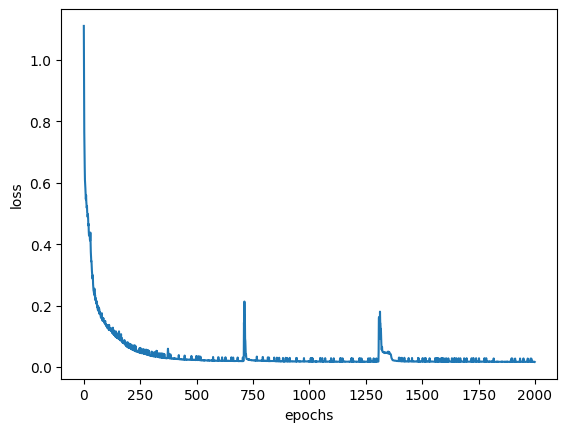

In [ ]:
# Plot the training loss over epochs
plt.plot([i for i in range(len(train_loss_list))], train_loss_list)
plt.xlabel('epochs')
plt.ylabel('loss')

   - **Loss:** Drops sharply initially and then has sporadic spikes.
   - **Interpretation:** The spikes could be due to the model encountering outliers or hard-to-learn samples. The learning rate could be too high, causing the model to overshoot the minimum.

You can see we reached near zero loss after 2000 epochs. However, we still need to evaluate our model on a validation set to explore its generalizability.

<hr>


### Evaluating Model Performance on Validation Data

This code snippet demonstrates how to evaluate the performance of a trained neural network on validation data using PyTorch. It specifically focuses on the calculation of the loss on both the validation and training datasets. Additionally, it introduces the concept of using `t.no_grad()` to ensure that gradient calculations are disabled during this evaluation phase, preventing further training of the model.

Explanation of the Syntax:

- `with t.no_grad()`: This context manager is used to disable gradient calculations within its block temporarily. It indicates to PyTorch that the following operations should not be used to update the model's weights and biases.

- `X = t.Tensor(X_test).type(t.float32)`: Converts the validation data `X_test` into a PyTorch tensor and specifies the data type as `float32`.

- `Y = t.Tensor(Y_test).type(t.float32)`: Converts the corresponding validation labels `Y_test` into a PyTorch tensor, also with the data type set to `float32`.

- `probs = forward(X)`: Calculates predictions (`probs`) on the validation data by passing it through the trained model using the `forward` function.

- `loss = loss_fn(probs.view(-1), Y)`
  - Computes the loss between the predicted probabilities (`probs`) and the actual labels (`Y`) using the same loss function (`loss_fn`) that was used during training.
  - `probs.view(-1)` reshapes the predictions to match the shape expected by the loss function.

- `print(loss.item())`: Prints the value of the loss for the validation dataset.

- The code block is repeated for the training dataset with similar operations to compute and print the training loss.


- **Validation Data**: Splitting the dataset into training and validation subsets is a common practice in machine learning to assess model generalization and detect overfitting.
- **Gradient Calculation**: Disabling gradient calculations using `t.no_grad()` ensures that the model's weights and biases are not updated during this evaluation phase. This is essential to get an accurate assessment of the model's performance on unseen data.
- **Overfitting**: The code highlights that overfitting is occurring because the loss on the validation dataset is much higher than the loss on the training dataset. Overfitting is a common issue where the model performs well on the training data but poorly on unseen data.

The output of this code indicates that the model's loss on the validation dataset is significantly higher than the loss on the training dataset, which suggests that the model may be overfitting to the training data. Further steps, such as adjusting model complexity or regularization techniques, may be needed to improve generalization.

In [ ]:
# Evaluate Model Performance on Validation Data

# Disable gradient calculations for evaluation using t.no_grad()
with t.no_grad():
    # Prepare the validation data
    X = t.Tensor(X_test).type(t.float32)  # Convert validation features to a PyTorch tensor
    Y = t.Tensor(Y_test).type(t.float32)  # Convert validation labels to a PyTorch tensor

    # Calculate predictions on the validation data
    probs = forward(X)  # Pass validation data through the trained model
    loss = loss_fn(probs.view(-1), Y)  # Compute the loss between predictions and actual labels

    # Print the validation loss
    print(loss.item())

    # Now, evaluate the model on the training data
    X = t.Tensor(X_train).type(t.float32)  # Convert training features to a PyTorch tensor
    Y = t.Tensor(Y_train).type(t.float32)  # Convert training labels to a PyTorch tensor

    # Calculate predictions on the training data
    probs = forward(X)  # Pass training data through the trained model
    loss = loss_fn(probs.view(-1), Y)  # Compute the loss between predictions and actual labels

    # Print the training loss
    print(loss.item())

2.0851404666900635
0.017644241452217102


<hr>

### Regularized Training of a Neural Network in PyTorch

Deep neural networks are prone to overfitting if there is not much data available during training, because they can model complex functions they can basically remember the training data patterns, and perform poorly on the test data. To address this, gathering more data or using less complex model architectures can be helpful. Additionally, we can add a regularization term to the loss, similar to classical models, and optimize this new loss to prevent overfitting. In this code example, we will apply `L2` regularization to prevent overfitting in a neural network. There is another common pattern named dropout that we will discuss soon. Hopefully, now you have a good sense of how a neural network works from the inside. Moving forward, you don't need to bother yourself with defining layers like this; we can use the `torch.nn` module to stack different types of layers as black boxes.

The following code demonstrates the training of a neural network in PyTorch with the application of `L2` regularization, a common technique used to prevent overfitting.  Regularization adds a penalty term to the loss function during training to discourage overly complex model weights. The code also includes the calculation of accuracy and visualization of training and validation accuracy over epochs.

- **L2 Regularization**: The code implements L2 regularization, also known as weight decay, which adds a penalty term to the loss function that encourages smaller and more balanced model weights.
- **Model Training**: The code demonstrates the training process of a neural network, including forward and backward passes, optimization, and monitoring loss and accuracy.
- **Model Evaluation**: The model's performance is evaluated on both training and validation data to assess its generalization.
- **Learning Rate Scheduling**: The code adjusts the learning rate during training to optimize convergence.

  <hr>

  
The neural network architecture is defined using the `nn.Sequential` container. This section of the code specifies the layers and activation functions that make up the model.

```python
model = nn.Sequential(
    nn.Linear(number_of_input_features, number_of_hidden_units),
    nn.Tanh(),
    nn.Linear(number_of_hidden_units, 1),
    nn.Sigmoid()
)
```

- `nn.Linear(number_of_input_features, number_of_hidden_units)`: This line defines the first layer of the neural network. It is a linear layer, also known as a fully connected layer or dense layer. It takes `number_of_input_features` as the input size and `number_of_hidden_units` as the output size. This layer performs a linear transformation on the input data.

- `nn.Tanh()`: After the first linear layer, a hyperbolic tangent (Tanh) activation function is added. Activation functions introduce non-linearity into the network, allowing it to learn complex patterns in the data.

- `nn.Linear(number_of_hidden_units, 1)`: This line defines the second linear layer. It takes `number_of_hidden_units` as input and has a single output unit. This layer further transforms the data.

- `nn.Sigmoid()`: Finally, a sigmoid activation function is added. Sigmoid is often used in binary classification tasks to squash the output into the range [0, 1], representing class probabilities.


In [ ]:
import torch as t
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt

# Regularization
# Deep neural networks are prone to overfitting if there is not much data available during training.

# Define hyperparameters
number_of_input_features = 12
number_of_hidden_units = 5
epochs = 100
learning_rate = 0.01
batch_size = 32
landa = 0.01  # Regularization term (lambda)

# Prepare the data
X_train_tensor = t.Tensor(X_train).type(t.float32)
Y_train_tensor = t.Tensor(Y_train).type(t.float32)

X_test_tensor = t.Tensor(X_test).type(t.float32)
Y_test_tensor = t.Tensor(Y_test).type(t.float32)

train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Define the neural network model with regularization
model = nn.Sequential(
    nn.Linear(number_of_input_features, number_of_hidden_units),  # Linear layer for matrix multiplication and bias addition
    nn.Tanh(),  # Tanh activation function
    nn.Linear(number_of_hidden_units, 1),  # Another linear layer
    nn.Sigmoid()  # Sigmoid activation for probability output
)

# Define the optimizer
optimizer = Adam(model.parameters(), lr=learning_rate)

# Define the loss function with Binary Cross-Entropy Loss
loss_fn = nn.BCELoss()

# Lists to store training accuracy, validation accuracy, and training loss over epochs
train_accuracy_list = []
validation_accuracy_list = []
train_loss_list = []

for epoch in range(epochs):
    if epoch % 500 == 0:
        learning_rate *= 0.9  # Learning rate scheduling

    per_epoch_loss_list = []

    for batch_idx, (X, Y) in enumerate(train_data_loader):
        # Forward pass: Compute predictions
        probs = model(X)

        # Adding regularization term for all parameters in the model
        l2_term = sum([(w ** 2).sum() for w in model.parameters()])

        # New loss is the old loss + regularization term
        loss = loss_fn(probs.view(-1), Y) + landa * l2_term

        per_epoch_loss_list.append(loss.item())

        # Backward pass: Compute gradient and update weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Evaluate the model on training and validation data
    with t.no_grad():
        # Set the model in eval mode; some layers use this for certain calculations during training
        model.eval()

        # Calculate accuracy on train data
        probs = model(X_train_tensor)
        prediction = (probs >= 0.5).type(t.LongTensor).view(-1)
        train_accuracy = (prediction == Y_train_tensor).type(t.float32).mean().item()

        # Calculate accuracy on validation data
        probs = model(X_test_tensor)
        prediction = (probs >= 0.5).type(t.LongTensor).view(-1)
        validation_accuracy = (prediction == Y_test_tensor).type(t.float32).mean().item()

        # Print accuracy for the current epoch
        print(f'Epoch {epoch}/{epochs} ---> Train Accuracy: {train_accuracy}, Validation Accuracy: {validation_accuracy}')

        # Set the model back to train mode
        model.train()

        # Append accuracy values to lists
        train_accuracy_list.append(train_accuracy)
        validation_accuracy_list.append(validation_accuracy)

    # Calculate and append the average loss for the epoch
    train_loss_list.append(sum(per_epoch_loss_list) / len(per_epoch_loss_list))

1. `import torch as t`: This line imports the PyTorch library and provides it with an alias 't' for easier access to its functionalities.

2. `number_of_input_features = 12`: This line sets a variable to hold the number of input features. Understanding the dimensionality of input data is crucial when defining the neural network architecture.

3. `number_of_hidden_units = 5`: Here, a variable stores the number of hidden units in the neural network. It determines the complexity of the hidden layers.

4. `learning_rate = 0.01`: This variable defines the initial learning rate used by the optimizer during training. Proper tuning of the learning rate is vital for training success.

5. `batch_size = 32`: This variable determines the size of mini-batches used during training. It affects the speed and stability of training.

6. `landa = 0.01`: This variable represents the regularization term (lambda) used in the loss function to control overfitting. Students should understand the role of regularization in preventing overfitting.

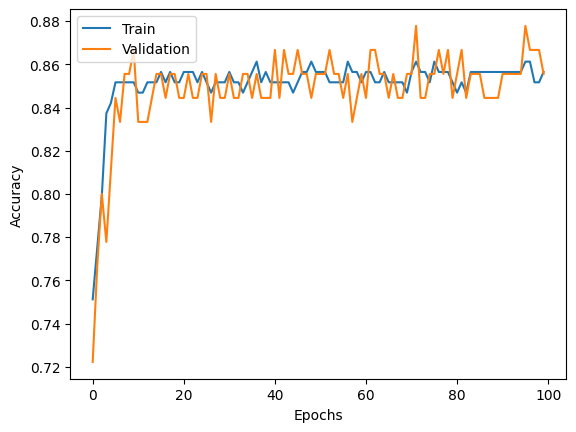

In [ ]:
# Plot training and validation accuracy over epochs
plt.plot([i for i in range(len(train_accuracy_list))], train_accuracy_list, label="Train")
plt.plot([i for i in range(len(validation_accuracy_list))], validation_accuracy_list, label="Validation")
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

   - **Training and Validation Accuracy:** They stabilize after initial fluctuations, showing that the model has found a good representation to classify the data correctly.
   - **Interpretation:** The model is performing well, achieving a balance between fitting the training data and generalizing to new data. Minor fluctuations might be due to the variability in the data.

- `plt.plot([i for i in range(len(train_accuracy_list))], train_accuracy_list, label="Train")`: This line creates a line plot for the training accuracy over epochs. It uses a list comprehension to generate the x-axis values, which are the epoch numbers (0, 1, 2, ...), and `train_accuracy_list` as the y-axis values. The `label` parameter is set to "Train" for labeling purposes.

- `plt.plot([i for i in range(len(validation_accuracy_list))], validation_accuracy_list, label="Validation")`: Similarly, this line creates a line plot for the validation accuracy over epochs. It uses the same technique to generate the x-axis values and uses `validation_accuracy_list` as the y-axis values. The `label` parameter is set to "Validation."

- `plt.legend(loc="upper left")`: This line adds a legend to the plot. It places the legend in the upper-left corner of the plot, and it distinguishes between the "Train" and "Validation" lines.

- `plt.xlabel('Epochs')`: This line sets the label for the x-axis, indicating that it represents the number of training epochs.

- `plt.ylabel('Accuracy')`: This line sets the label for the y-axis, indicating that it represents accuracy values.

- `plt.show()`: Finally, this command displays the plot on the screen. It's necessary to call `plt.show()` to visualize the plotted data.

We successfully mitigated the issue of overfitting by incorporating regularization techniques. While we made slight adjustments to these hyperparameters during the model tuning process, it is important to note that hyperparameter tuning is a critical step in machine learning. I encourage you to experiment with various hyperparameter settings to achieve better performance in this classification problem and potentially surpass the accuracy achieved in my model.

<hr>
<br>
<font color='#532b88' size=6>Dropout In Neural Networks</font>

Dropout is a simple yet effective technique in the context of neural networks and deep learning that plays a crucial role in preventing overfitting. In this section, we will explore the concept of dropout and how it helps enhance the generalization capability of neural networks.

**What is Dropout?**
Dropout is a *regularization technique* that works by randomly deactivating (setting to zero) a certain portion of neurons or units in a neural network during each forward and backward pass. This means that, at each training iteration, some of the neurons are temporarily "dropped out" of the network, making them inactive for that particular iteration.

**Why Use Dropout?**
The primary motivation behind dropout is to combat overfitting, which occurs when a neural network becomes too specialized in learning the training data and does not generalize well to new, unseen data. Overfitting is often characterized by excessively complex models with weights that are overly tuned to the training data.

**How Does Dropout Work?**
When dropout is applied to a layer in a neural network, it **randomly** sets a fraction of the layer's outputs to zero during each training iteration. This randomness introduces a level of uncertainty into the network's training process. As a result:

1. **Reduced Reliance on Specific Neurons:** By randomly zeroing out neurons, the network cannot rely too heavily on any single neuron or feature. This forces the network to distribute the learning across many neurons, making the model more robust.
2. **Ensemble Effect:** Dropout effectively creates an ensemble of many subnetworks. During inference (when making predictions), these subnetworks are combined, and their collective knowledge results in more robust and less overfitted predictions.
3. **Weight Regularization:** Similar to traditional regularization techniques like `L1` or `L2` regularization, dropout encourages smaller weight values, as neurons must learn to be useful even when some of their inputs are randomly dropped.

**Dropout and Weight Decay (Regularization)**
Dropout can be thought of as a form of weight decay or regularization. Regularization techniques like `L2` regularization explicitly penalize large weight values by adding a regularization term to the loss function. Dropout, on the other hand, implicitly encourages weight values to stay small because neurons must perform well even when some of their inputs are dropped. To gain a deeper understanding of dropout and its implications, I recommend reading the original paper on dropout by [Geoffrey Hinton, Nitish Srivastava, Alex Krizhevsky, Ilya Sutskever, and Ruslan Salakhutdinov](https://www.jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf?utm_content=buffer79b43&utm_medium=social&utm_source=twitter.com&utm_campaign=buffer). It provides valuable insights into the rationale behind dropout and its effectiveness in improving the generalization of neural networks.

In [ ]:
number_of_input_features = 12  # Number of input features in the dataset

# Reduced number of hidden units to 5 and just using 1 hidden layer
number_of_hidden_units = 5  # Number of hidden units in the neural network
epochs = 1000  # Number of training epochs
learning_rate = 0.01  # Learning rate for the optimizer
batch_size = 32  # Number of samples in each training batch
dropout_probablity = 0.6  # Probability of dropping out a neuron in dropout layer

# Convert training and testing data to PyTorch tensors
X_train_tensor = t.Tensor(X_train).type(t.float32)
Y_train_tensor = t.Tensor(Y_train).type(t.float32)
X_test_tensor = t.Tensor(X_test).type(t.float32)
Y_test_tensor = t.Tensor(Y_test).type(t.float32)

# Create a training dataset and data loader
train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Define the neural network model
model = Sequential(
    Linear(number_of_input_features, number_of_hidden_units),  # Linear layer for matrix multiplication and bias addition
    Tanh(),  # Add Tanh activation function
    Dropout(dropout_probablity),  # Dropout layer to prevent overfitting
    Linear(number_of_hidden_units, 1),  # Another linear layer
    Sigmoid()  # Sigmoid activation for probability output
)

# Define the optimizer
optimizer = Adam(model.parameters(), lr=learning_rate)

# Define the loss function as Binary Cross-Entropy Loss
loss_fn = t.nn.BCELoss()

train_accuracy_list = []  # List to store training accuracy
validation_accuracy_list = []  # List to store validation accuracy

# Training loop
for epoch in range(epochs):
    if epoch % 500 == 0:
        learning_rate *= 0.9  # Learning rate scheduling

    per_epoch_loss_list = []  # List to store losses for each epoch

    for batch_idx, (X, Y) in enumerate(train_data_loader):
        # Forward pass: Compute predictions
        probs = model(X)

        # Calculate the loss
        loss = loss_fn(probs.view(-1), Y)
        per_epoch_loss_list.append(loss.item())

        # Backward pass: Compute gradients and update weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Evaluate the model on training and validation data
    with t.no_grad():
        # Set the model in eval mode; some layers use this for certain calculations during training
        model.eval()

        # Calculate accuracy on train data
        probs = model(X_train_tensor)
        prediction = (probs >= 0.5).type(t.LongTensor).view(-1)
        train_accuracy = (prediction == Y_train_tensor).type(t.float32).mean().item()

        # Calculate accuracy on validation data
        probs = model(X_test_tensor)
        prediction = (probs >= 0.5).type(t.LongTensor).view(-1)
        validation_accuracy = (prediction == Y_test_tensor).type(t.float32).mean().item()

        print(f'epoch {epoch}/{epochs} ---> train_accuracy: {train_accuracy}, validation_accuracy: {validation_accuracy}')

        # Set the model back to train mode
        model.train()

        # Append accuracy values to lists
        train_accuracy_list.append(train_accuracy)
        validation_accuracy_list.append(validation_accuracy)


In the following code snippet from the above section:

```python
model = Sequential(
    Linear(number_of_input_features, number_of_hidden_units),  # Linear layer for matrix multiplication and bias addition
    Tanh(),  # Add Tanh activation function
    Dropout(dropout_probability),  # Dropout layer to prevent overfitting
    Linear(number_of_hidden_units, 1),  # Another linear layer
    Sigmoid()  # Sigmoid activation for probability output
)
```

1. `Linear(number_of_input_features, number_of_hidden_units)`: The first line adds a linear layer to the model. This layer performs a linear transformation of the input features. It takes `number_of_input_features` as the input dimension and `number_of_hidden_units` as the output dimension. This layer is essential for learning complex patterns in the data through matrix multiplication and bias addition.

2. `Tanh()`: After the first linear layer, a Tanh activation function is added. Activation functions introduce non-linearity into the neural network. In this case, Tanh squashes the output values between -1 and 1, allowing the model to capture complex relationships in the data.

3. `Dropout(dropout_probability)`: Here, a dropout layer is added to the model. Dropout is a regularization technique that randomly sets a fraction of the neuron outputs to zero during each forward pass. The `dropout_probability` parameter defines the probability of dropping out each neuron's output. Dropout helps prevent overfitting by making it more challenging for the model to rely too heavily on any particular set of neurons. It encourages the network to learn more robust features.

4. `Linear(number_of_hidden_units, 1)`: This line adds another linear layer after the dropout layer. It takes the `number_of_hidden_units` from the previous layer as input and has a single output unit. This layer further transforms the data.

5. `Sigmoid()`: Finally, a sigmoid activation function is added. Sigmoid squashes the output to the range [0, 1], which is often used for binary classification problems. It outputs probabilities, indicating the likelihood of belonging to a particular class.

The dropout layer is a key component that introduces randomness into the network, helping it generalize better by discouraging over-reliance on specific neurons and encouraging more robust learning.

Text(0, 0.5, 'accuracy')

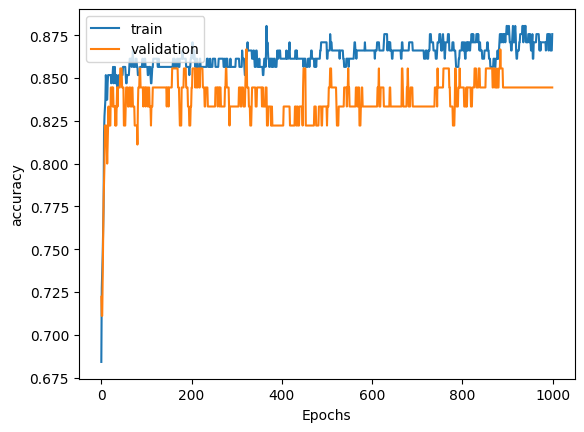

In [ ]:
# Plot training and validation accuracy over epochs
plt.plot([i for i in range(len(train_accuracy_list))], train_accuracy_list, label="train")
plt.plot([i for i in range(len(validation_accuracy_list))], validation_accuracy_list, label="validation")
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('accuracy')

   - **Training and Validation Accuracy:** Both are fluctuating and not stabilizing, indicating that the model is having trouble learning consistent patterns.
   - **Interpretation:** The model might be too complex or the learning rate too high, causing instability in learning. It could also indicate noisy or less representative validation data.

<hr>
<br>
<font color='#532b88' size=6>Halting the Overfit: Early Stopping in Neural Networks</font>

Early stopping is a regularization technique employed during neural network training to prevent overfitting. It operates by continuously evaluating the model's performance on a validation set. When the model starts learning patterns that are specific to the training data but don't apply to new, unseen data, early stopping intervenes.

Consider a medical diagnosis neural network. If we train it for too many epochs, it might memorize individual patient cases, including noise in the data, rather than learning general diagnostic patterns. Early stopping ensures that training halts at an optimal point, preventing overfitting. This guarantees that our model generalizes effectively to make accurate predictions on new patient data.

In [ ]:
# Importing necessary libraries
import torch as t
from torch.utils.data import TensorDataset, DataLoader
from torch.nn import Sequential, Linear, Tanh, Sigmoid
from torch.optim import Adam
from torch.nn import BCELoss
import matplotlib.pyplot as plt

# Defining the parameters
number_of_input_features = 12
number_of_hidden_units = 5
epochs = 1000
learning_rate = 0.01
batch_size = 32

# Loading and preprocessing the data
X_train_tensor = t.Tensor(X_train).type(t.float32)
Y_train_tensor = t.Tensor(Y_train).type(t.float32)

X_test_tensor = t.Tensor(X_test).type(t.float32)
Y_test_tensor = t.Tensor(Y_test).type(t.float32)

train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Creating a neural network model
model = Sequential(
    Linear(number_of_input_features, number_of_hidden_units),
    Tanh(),
    Linear(number_of_hidden_units, 1),
    Sigmoid()
)

# Setting up the optimizer and loss function
optimizer = Adam(model.parameters(), lr=learning_rate)
loss_fn = BCELoss()

# Lists to store accuracy values during training
train_accuracy_list = []
validation_accuracy_list = []

# Main training loop
for epoch in range(epochs):
    # Learning rate scheduling (optional)
    if epoch % 500 == 0:
        learning_rate *= .9

    per_epoch_loss_list = []

    for batch_idx, (X, Y) in enumerate(train_data_loader):
        probs = model(X)

        # new loss is the old loss + regularization term
        loss = loss_fn(probs.view(-1), Y)

        per_epoch_loss_list.append(loss.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    with t.no_grad():
        # Calculate accuracy on train data
        model.eval()
        probs = model(X_train_tensor)
        prediction = (probs >= .5).type(t.LongTensor).view(-1)

        train_accuracy = (prediction == Y_train_tensor).type(t.float32).mean().item()

        # Calculate accuracy on validation data
        probs = model(X_test_tensor)
        prediction = (probs > .5).type(t.LongTensor).view(-1)

        validation_accuracy = (prediction == Y_test_tensor).type(t.float32).mean().item()

        print(f'epoch {epoch}/{epochs} ---> train_accuracy : {train_accuracy} , validation_accuracy : {validation_accuracy}')
        model.train()
        train_accuracy_list.append(train_accuracy)
        validation_accuracy_list.append(validation_accuracy)

Text(0, 0.5, 'Accuracy')

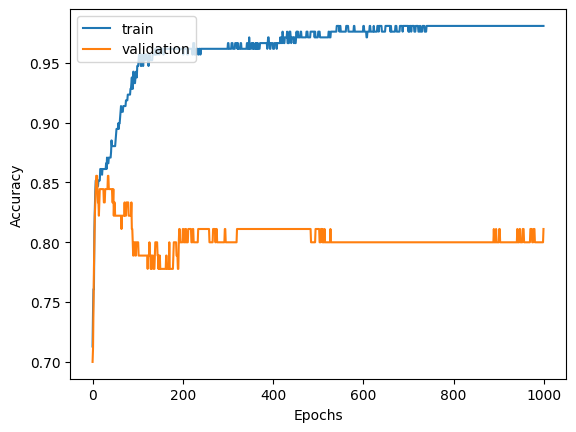

In [ ]:
# Plotting the training and validation accuracy
plt.plot([i for i in range(len(train_accuracy_list))], train_accuracy_list, label="train")
plt.plot([i for i in range(len(validation_accuracy_list))], validation_accuracy_list, label='validation')
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

   - **Training Accuracy:** Rapidly increases and seems to reach a plateau, indicating that the model fits the training data well.
   - **Validation Accuracy:** Increases along with the training accuracy but starts to stabilize, showing that the model generalizes well to new data.
   - **Interpretation:** The model has learned the patterns in the training data effectively and generalizes well to unseen data. There might be a slight indication of overfitting as the training accuracy continues to increase while validation accuracy stabilizes.


In conclusion, making neural networks perform effectively often requires careful attention and hyperparameter tuning. It is important to keep in mind that neural networks typically do not yield optimal results right out of the box. Instead, you will need to apply the lessons you have learned on hyperparameter tuning to find the right settings for parameters like the number of layers, hidden units, learning rate, and epochs. Also, it is worth noting that training larger networks can be a time-consuming process. To expedite this, consider utilizing GPU servers, as they can significantly accelerate training times and make the experimentation process more efficient.